In [24]:
import pandas as pd
import numpy as np

import missingno as msno # 결측치 확인용 graph 

# 데이터 불러오기
배추, 대파, 마늘, 무, 고추(건고추)

강수량(평균,최대), 기온(평균,최고,최저), 습도(평균,최저), 풍속(평균,최대)
거래량, 가격 

In [25]:
path = "./Dataset/"

df = pd.read_csv(path+"da_data.csv")
#df = pd.read_csv(path+"da_data_nozero.csv")

In [26]:
df

,날짜,평균강수량,최대강수량,평균기온,최고기온,최저기온,평균습도,최저습도,평균풍속,최대풍속,건고추가격,건고추거래량,배추가격,배추거래량,대파가격,대파거래량,마늘가격,마늘거래량,무가격,무거래량
0,2014-01-01,0.0,0.1,4.8,9.2,-0.3,51,11,3.0,15.5,0.00000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00
1,2014-01-02,0.0,0.0,2.6,9.1,-2.2,49,10,1.6,9.3,0.00000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00
2,2014-01-03,0.0,0.0,2.6,10.1,-3.2,54,12,1.2,9.6,0.00000,0.00,471.249011,549.64,857.382976,408.89,3530.248412,77.13,307.198836,833.98
3,2014-01-04,1.2,31.0,1.5,6.9,-2.8,63,12,1.7,11.9,0.00000,0.00,425.448876,423.95,891.743009,322.98,2409.531445,17.65,300.931167,615.89
4,2014-01-05,0.1,30.2,0.7,6.6,-3.7,62,9,1.6,10.1,0.00000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,2021-11-02,0.3,10.9,10.9,17.1,6.0,75,28,1.3,11.6,11971.89808,1.51,609.470751,1750.03,1283.080893,630.13,6286.589514,157.07,400.806844,2399.58
2863,2021-11-03,0.1,1.5,11.0,17.8,5.6,74,10,1.1,11.0,9445.59644,2.42,656.528378,1780.28,1300.993601,637.09,6869.454022,110.99,420.406337,2300.00
2864,2021-11-04,0.4,8.1,11.5,18.9,6.0,75,15,1.0,7.0,11164.84516,1.78,683.763982,1818.99,1288.978649,619.61,6321.296450,126.64,438.661088,2191.04
2865,2021-11-05,0.0,0.2,11.5,19.2,5.6,74,19,1.0,7.3,11821.50584,1.11,843.963716,1865.10,1317.351936,611.46,6444.043650,112.39,460.635042,2216.05


In [27]:
df.columns

Index(['날짜', '평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '건고추가격', '건고추거래량', '배추가격', '배추거래량', '대파가격', '대파거래량', '마늘가격',
       '마늘거래량', '무가격', '무거래량'],
      dtype='object')

# 결측치 확인 
결측치는 모두 0으로 채워져 있기 때문에 missingno, isna()방식으로는 잡히지 않는다. 

결측치는
1. 탈락시키거나 
2. 앞뒤 평균값으로 채우거나
두 가지 방식으로 비교한다. 

In [28]:
# 가격이 0인 데이터 확인 -> 거래량도 동일 
# 건고추 986 / 배추 444 / 무 442 / 마늘 466 / 대파 442
isZero = df['배추가격'] == 0 
df[isZero]

,날짜,평균강수량,최대강수량,평균기온,최고기온,최저기온,평균습도,최저습도,평균풍속,최대풍속,건고추가격,건고추거래량,배추가격,배추거래량,대파가격,대파거래량,마늘가격,마늘거래량,무가격,무거래량
0,2014-01-01,0.0,0.1,4.8,9.2,-0.3,51,11,3.0,15.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-01-02,0.0,0.0,2.6,9.1,-2.2,49,10,1.6,9.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-01-05,0.1,30.2,0.7,6.6,-3.7,62,9,1.6,10.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,2014-01-12,0.0,6.4,-0.4,5.3,-5.1,56,14,2.3,15.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,2014-01-19,0.0,1.5,-1.7,4.6,-8.3,49,8,1.4,13.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,2021-10-17,0.0,29.2,6.4,12.5,1.8,53,15,2.2,17.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2852,2021-10-23,0.0,0.1,10.1,18.5,4.1,70,14,1.1,8.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2853,2021-10-24,0.0,0.0,10.4,18.6,4.4,72,13,1.0,6.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2859,2021-10-30,0.1,1.7,11.8,17.8,7.6,76,35,0.9,7.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df['건고추가격'].value_counts()

0.000000        550
7500.000000      26
15000.000000     26
12000.000000     20
10000.000000     19
               ... 
11600.528400      1
9701.345445       1
11029.106630      1
23612.433990      1
24333.333330      1
Name: 건고추가격, Length: 1642, dtype: int64

In [7]:
print(df['건고추가격'].unique())
print(df['건고추가격'].nunique())
print(df.info())

[    0.        5850.        5970.441176 ... 11164.84516  11821.50584
 10752.33234 ]
1642
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      2431 non-null   object 
 1   평균강수량   2431 non-null   float64
 2   최대강수량   2431 non-null   float64
 3   평균기온    2431 non-null   float64
 4   최고기온    2431 non-null   float64
 5   최저기온    2431 non-null   float64
 6   평균습도    2431 non-null   int64  
 7   최저습도    2431 non-null   int64  
 8   평균풍속    2431 non-null   float64
 9   최대풍속    2431 non-null   float64
 10  건고추가격   2431 non-null   float64
 11  건고추거래량  2431 non-null   float64
 12  배추가격    2431 non-null   float64
 13  배추거래량   2431 non-null   float64
 14  대파가격    2431 non-null   float64
 15  대파거래량   2431 non-null   float64
 16  마늘가격    2431 non-null   float64
 17  마늘거래량   2431 non-null   float64
 18  무가격     2431 non-null   float64
 19  무거래량    2431 non-null 

<AxesSubplot:>

C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Gl

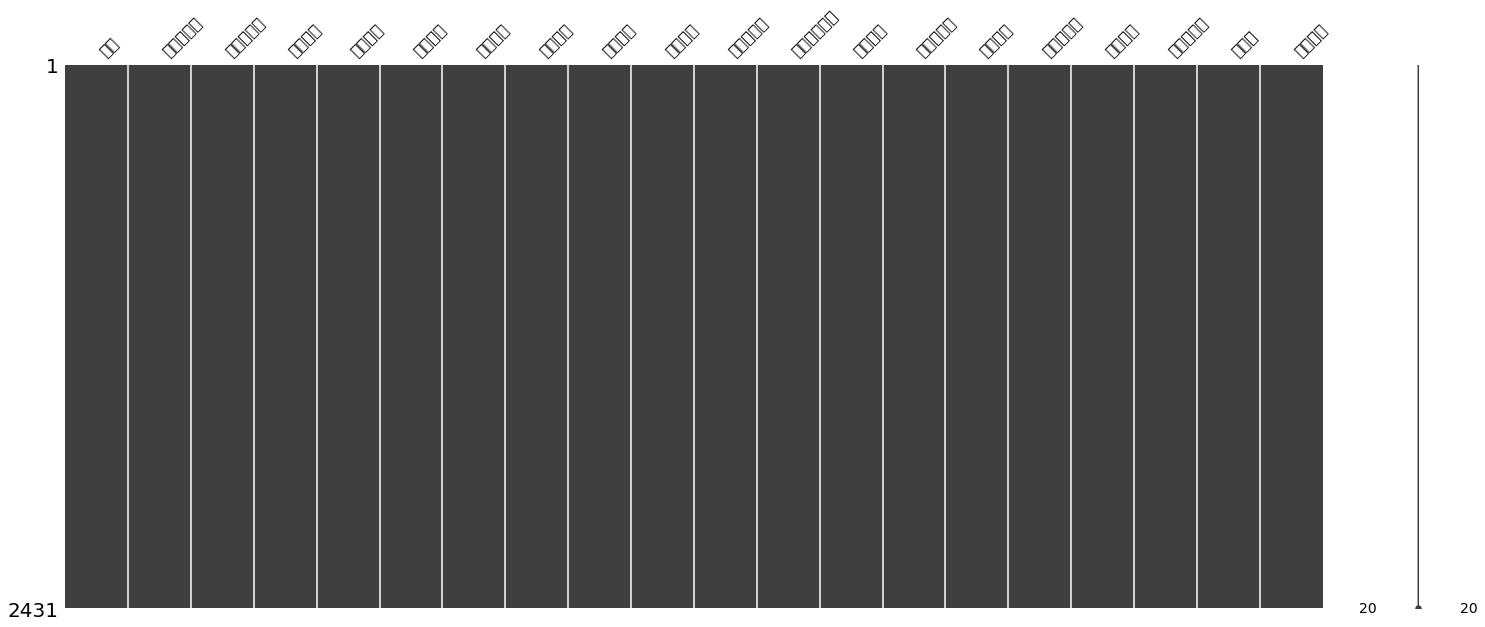

In [8]:
msno.matrix(df)

In [29]:
df.columns[df.isna().any()].tolist()

[]

In [9]:
df.describe()

,평균강수량,최대강수량,평균기온,최고기온,최저기온,평균습도,최저습도,평균풍속,최대풍속,건고추가격,건고추거래량,배추가격,배추거래량,대파가격,대파거래량,마늘가격,마늘거래량,무가격,무거래량
count,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000
mean,3.380337,25.204401,13.484903,18.956849,8.720814,68.198272,23.117236,1.885027,12.019951,9961.630639,1.885971,614.095219,897.446376,1428.592663,456.890045,3928.242010,83.549186,521.423585,1004.964755
std,8.548110,44.243197,9.428927,9.401797,9.876143,13.153673,13.167293,0.652818,4.268979,8594.106038,11.979551,319.899209,555.922253,714.026344,187.077150,1277.536258,101.727995,238.985869,503.608275
min,0.000000,0.000000,-12.300000,-7.300000,-16.800000,31.000000,0.000000,0.900000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.300000,5.200000,10.800000,0.100000,58.000000,12.000000,1.400000,8.900000,5340.289855,0.002000,383.816935,571.345000,962.778987,314.770000,2930.186007,21.460000,348.518635,668.480000
50%,0.100000,6.400000,14.300000,20.500000,9.000000,70.000000,21.000000,1.700000,11.000000,9991.266376,0.130000,533.480377,779.830000,1269.239616,413.250000,3990.730994,52.030000,433.631681,878.760000
75%,2.000000,30.250000,21.700000,26.950000,17.700000,78.000000,32.000000,2.200000,14.100000,13759.465075,0.665000,775.405188,1064.550000,1691.104680,603.010000,4960.682628,112.960000,651.087850,1289.265000
max,101.900000,384.300000,30.300000,36.600000,25.900000,96.000000,66.000000,5.200000,49.000000,170045.888900,235.180000,3066.238778,4832.440000,5431.070105,1109.150000,11172.960400,1083.760000,2200.000000,4154.510000


# 전처리

In [10]:
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속', '최대풍속',
       '무가격', '무거래량', '배추가격', '배추거래량', '대파가격', '대파거래량', '마늘가격', '마늘거래량', '무가격', '무거래량']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,평균강수량,최대강수량,평균기온,최고기온,최저기온,평균습도,최저습도,평균풍속,최대풍속,무가격,무거래량,배추가격,배추거래량,대파가격,대파거래량,마늘가격,마늘거래량,무가격,무거래량
0,0.000000,0.000000,0.349765,0.396355,0.318501,0.353846,0.181818,0.069767,0.100457,0.139636,0.200741,0.153690,0.113740,0.157866,0.368652,0.315964,0.071169,0.139636,0.200741
1,0.011776,0.080666,0.323944,0.323462,0.327869,0.492308,0.181818,0.186047,0.152968,0.136787,0.148246,0.138753,0.087730,0.164193,0.291196,0.215657,0.016286,0.136787,0.148246
2,0.000000,0.028623,0.293427,0.339408,0.274005,0.430769,0.181818,0.046512,0.057078,0.120273,0.209630,0.132133,0.126536,0.174627,0.320795,0.252591,0.021269,0.120273,0.209630
3,0.000000,0.003903,0.333333,0.343964,0.292740,0.446154,0.242424,0.046512,0.063927,0.113650,0.196959,0.130123,0.102197,0.171780,0.283983,0.210698,0.013149,0.113650,0.196959
4,0.017664,0.107468,0.338028,0.287016,0.360656,0.523077,0.378788,0.348837,0.285388,0.113545,0.144248,0.135076,0.071039,0.181844,0.255304,0.215605,0.014542,0.113545,0.144248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,0.002944,0.028363,0.544601,0.555809,0.533958,0.676923,0.424242,0.093023,0.146119,0.182185,0.577584,0.198768,0.362142,0.236248,0.568120,0.562661,0.144931,0.182185,0.577584
2427,0.000981,0.003903,0.546948,0.571754,0.524590,0.661538,0.151515,0.046512,0.132420,0.191094,0.553615,0.214115,0.368402,0.239546,0.574395,0.614828,0.102412,0.191094,0.553615
2428,0.003925,0.021077,0.558685,0.596811,0.533958,0.676923,0.227273,0.023256,0.041096,0.199391,0.527388,0.222998,0.376412,0.237334,0.558635,0.565767,0.116852,0.199391,0.527388
2429,0.000000,0.000520,0.558685,0.603645,0.524590,0.661538,0.287879,0.023256,0.047945,0.209380,0.533408,0.275244,0.385954,0.242558,0.551287,0.576753,0.103704,0.209380,0.533408


## 평가 지표 함수 작성 

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
def get_clf_eval(test_y, pred) :
    confusion = confusion_matrix(test_y, pred)
    accuracy = accuracy_score(test_y, pred)
    precision = precision_score(test_y, pred)
    recall = recall_score(test_y, pred)
    # Add F1 score 
    f1 = f1_score(test_y, pred)
    # Add ROC-AUC 
    #roc_auc = roc_auc_score(test_y, pred_proba)
    print('오차 행렬')
    print(confusion)
    # Add f1 score print 
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'
         .format(accuracy, precision, recall, f1))

# 모델 학습 준비 
xgboost , lightgbm, ensemble 3가지 방법으로 예측해볼 예정

In [36]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

from sklearn.ensemble import RandomForestClassifier

In [13]:
X_column = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '대파거래량']
y_column = '대파가격'

input_data = df_scaled[X_column + [y_column]].copy()
input_data

,평균강수량,최대강수량,평균기온,최고기온,최저기온,평균습도,최저습도,평균풍속,최대풍속,대파거래량,대파가격
0,0.000000,0.000000,0.349765,0.396355,0.318501,0.353846,0.181818,0.069767,0.100457,0.368652,0.157866
1,0.011776,0.080666,0.323944,0.323462,0.327869,0.492308,0.181818,0.186047,0.152968,0.291196,0.164193
2,0.000000,0.028623,0.293427,0.339408,0.274005,0.430769,0.181818,0.046512,0.057078,0.320795,0.174627
3,0.000000,0.003903,0.333333,0.343964,0.292740,0.446154,0.242424,0.046512,0.063927,0.283983,0.171780
4,0.017664,0.107468,0.338028,0.287016,0.360656,0.523077,0.378788,0.348837,0.285388,0.255304,0.181844
...,...,...,...,...,...,...,...,...,...,...,...
2426,0.002944,0.028363,0.544601,0.555809,0.533958,0.676923,0.424242,0.093023,0.146119,0.568120,0.236248
2427,0.000981,0.003903,0.546948,0.571754,0.524590,0.661538,0.151515,0.046512,0.132420,0.574395,0.239546
2428,0.003925,0.021077,0.558685,0.596811,0.533958,0.676923,0.227273,0.023256,0.041096,0.558635,0.237334
2429,0.000000,0.000520,0.558685,0.603645,0.524590,0.661538,0.287879,0.023256,0.047945,0.551287,0.242558


In [14]:
# train / test data split 
tr_val_X, test_X, tr_val_y, test_y = train_test_split(
    input_data[X_column], 
    input_data[y_column],
    test_size=0.2,
    shuffle=True,   # random split 
    random_state=42) # seed 고정, same sampling 

print(tr_val_X.shape, test_X.shape)

(1944, 10) (487, 10)


In [15]:
# train / valid data split 
tr_val_data = pd.concat([tr_val_X, tr_val_y], axis=1)

train_X, valid_X, train_y, valid_y = train_test_split(
    tr_val_data[X_column],
    tr_val_data[y_column], 
    test_size = 0.2, 
    shuffle=True,
    random_state=42)

In [16]:
dtrain = xgb.DMatrix(data=train_X, label=train_y)
dtest = xgb.DMatrix(data=test_X, label=test_y)
wlist = [(dtrain, 'train'), (dtest,'eval')]

In [17]:
params = { 
    'max_depth':3,
    'eta':0.1,
    'objective':'reg:linear',
    'eval_metric':'logloss',
    'early_stoppings':100
}
num_rounds = 400 

#model_xgb = xgb.XGBRegressor(params=params)
#model_xgb.fit(dtrain,)
model_xgb = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

'''
model_xgb = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
                          learning_rate = 0.05, max_depth = 5,
                             max_features='sqrt', min_samples_leaft=15, min_samples_split=10,
                             loss='huber', random_state=5,
                             alpha = 10, n_estimators = 10)
model_xgb.fit(train_X,train_y, eval_set=[(valid_X, valid_y)])
'''

[14:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.67104	eval-logloss:0.67143
[1]	train-logloss:0.65302	eval-logloss:0.65373
[2]	train-logloss:0.63808	eval-logloss:0.63899
[3]	train-logloss:0.62578	eval-logloss:0.62694
[4]	train-logloss:0.61567	eval-logloss:0.61710
[5]	train-logloss:0.60734	eval-logloss:0.60894
[6]	train-logloss:0.60057	eval-logloss:0.60254
[7]	train-logloss:0.59488	eval-logloss:0.59721
[8]	train-logloss:0.590

"\nmodel_xgb = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, \n                          learning_rate = 0.05, max_depth = 5,\n                             max_features='sqrt', min_samples_leaft=15, min_samples_split=10,\n                             loss='huber', random_state=5,\n                             alpha = 10, n_estimators = 10)\nmodel_xgb.fit(train_X,train_y, eval_set=[(valid_X, valid_y)])\n"

In [18]:
xgb_preds = model_xgb.predict(dtest)

In [37]:
print(classification_report(test_y, xgb_preds))

ValueError: continuous is not supported

In [20]:
df_result = pd.DataFrame(list(zip(test_y, xgb_preds)), columns=['true_y', 'xgb_pred_y'])
df_result 

,true_y,xgb_pred_y
0,0.358729,0.194071
1,0.146171,0.195870
2,0.299085,0.247245
3,0.253272,0.249440
4,0.192438,0.260487
...,...,...
482,0.176590,0.227021
483,0.284801,0.225640
484,0.193866,0.188674
485,0.161480,0.268149


In [21]:
mse = mean_squared_error(test_y, xgb_preds)
print("mse:  %f" % mse)

rmse = np.sqrt(mse)
print("rmse: %f" %rmse)

mse:  0.017878
rmse: 0.133710


### XGBosst Featrue importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

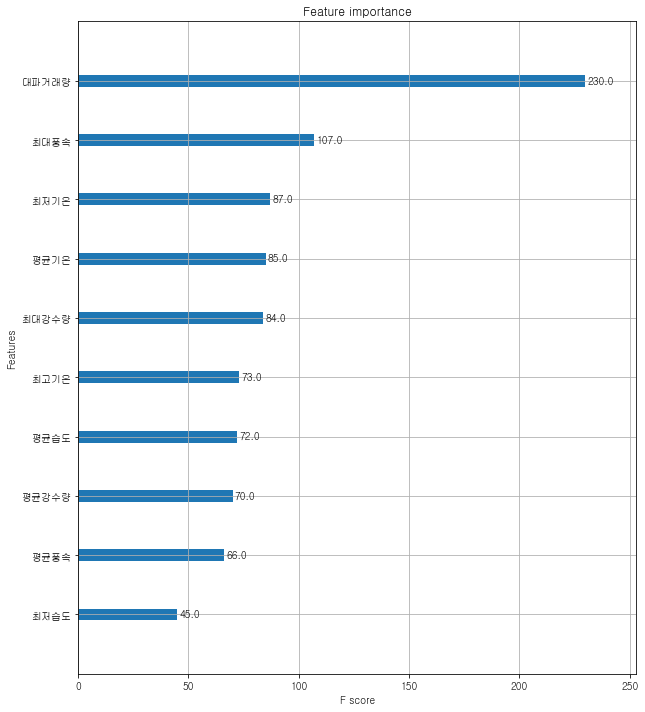

In [22]:
from xgboost import plot_importance 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(model_xgb, ax=ax)

# LightGBM

In [23]:
train_ds = lgb.Dataset(train_X, label= train_y)
val_ds = lgb.Dataset(valid_X, label = valid_y)
test_ds = lgb.Dataset(X_test, label = y_test)

model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                             learning_rate = 0.05, n_estimators=720,
                             max_bin =55, baggint_fraction =0.8, 
                             bagging_freq=5, feature_faction = 0.2319,
                             feature_fraction_seed=9, bagging_seed=9,
                             min_data_in_leaf=6, min_sum_hessian_in_leaf=11)

model_lgb.fit(train_X, train_y)
lgb_pred = model_lgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
print("RMSE: %f" % (rmse))

NameError: name 'X_test' is not defined